In [1]:
# Import dependencies
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
import timeit
from IPython.display import display 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
# Read in the data as a dataframe.
df = pd.read_csv('NRD_2017_Defined_Cohort_Five_IBD.csv')
df.head()

,key_nrd,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,i10_dx1,i10_dx2,i10_dx3,i10_dx4,i10_dx5,i10_dx6,i10_dx7,i10_dx8,i10_dx9,i10_dx10,i10_dx11,i10_dx12,i10_dx13,i10_dx14,i10_dx15,i10_dx16,i10_dx17,i10_dx18,i10_dx19,i10_dx20,i10_dx21,i10_dx22,i10_dx23,i10_dx24,i10_dx25,i10_dx26,i10_dx27,i10_dx28,i10_dx29,i10_dx30,i10_dx31,i10_dx32,i10_dx33,i10_dx34,i10_dx35,i10_dx36,i10_dx37,i10_dx38,i10_dx39,i10_dx40,elective,female,hcup_ed,hosp_nrd,los,mdc,mdc_nopoa,i10_ndx,i10_npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,pay1,pl_nchs,i10_pr1,i10_pr2,i10_pr3,i10_pr4,i10_pr5,i10_pr6,i10_pr7,i10_pr8,i10_pr9,i10_pr10,i10_pr11,i10_pr12,i10_pr13,i10_pr14,i10_pr15,i10_pr16,i10_pr17,i10_pr18,i10_pr19,i10_pr20,i10_pr21,i10_pr22,i10_pr23,i10_pr24,i10_pr25,prday1,prday2,prday3,prday4,prday5,prday6,prday7,prday8,prday9,prday10,prday11,prday12,prday13,prday14,prday15,prday16,prday17,prday18,prday19,prday20,prday21,prday22,prday23,prday24,prday25,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,dxver,prver,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,aprdrg,aprdrg_risk_mortality,aprdrg_severity,next_nrdday,days_to_readmission,readmission_diagnosis,second_readmission_diagnosis,third_readmission_diagnosis,readmission_los,readmission_died,readmission_charges,readmission_elective,preventable_admission,pqi_1,pqi_3,pqi_5,pqi_7,pqi_8,pqi_11,pqi_12,pqi_14,pqi_15,pqi_16,readmission_preventable,medical_admission,hfrs_score,hfrs_severity,cc_score,cc_severity,cc_MI,cc_CHF,cc_PVD,cc_CVD,cc_dementia,cc_COPD,cc_rheum,cc_peptic_ulcer,cc_mild_liver_disease,cc_diabetes_wo_complications,cc_diabetes_w_complications,cc_plegia,cc_renal,cc_malignancy,cc_severe_liver,cc_metastasis,cc_AIDS,ibd_diagnosis,ibd_index_hospitalization,intestinal_abscess,meningitis,encephalitis,endocarditis,pneumonia,pyelonephritis,septic_arthritis_osteomyelitis,septicemia_or_bacteremia,clostridium_difficile,pulmonary_tuberculosis,atypical_mycobacteria,cryptococcosis_aspergillosis_histoplasmosis,listeriosis,leishmaniasis,pneumocystis_jiroveci_pneumonia,acute_myocardial_infarction,heart_failure,unstable_angina,arrhythmia,cardiac_arrest,vte_diagnosis_pe_or_dvt,history_of_vte,systemic_steroid_use,chronic_pain,opioid_overuse,depression,anxiety_disorder,bipolar_disorder,schizophrenia,problems_related_to_education_and_literacy,problems_related_to_employment_and_unemployment,occupational_exposure_to_risk_factors,problems_related_to_housing_and_economic_circumstances,problems_related_to_social_environment,problems_related_to_upbringing,other_problems_related_to_primary_support_group_including_family_circumstances,problems_related_to_certain_psychosocial_circumstances,problems_related_to_other_psychosocial_circumstances,intestinal_surgery,flexible_sigmoidoscopy_colonoscopy,blood_transfusion,parenteral_or_enteral_nutrition,serious_infections_during_followup,total_serious_infection_admissions,opportunistic_infections_during_followup,total_opportunistic_infection_admissions,cardiac_during_followup,total_cardiac_admissions,venous_thromboembolism_during_followup,total_venous_thromboembolism_admissions,steroid_use_during_followup,total_steroid_use_admissions,chronic_pain_during_followup,total_chronic_pain_admissions,opioid_overuse_during_followup,total_opioid_overuse_admissions,psychiatric_burden_during_followup,total_psychiatric_burden_admissions,social_determinants_of_health_during_followup,total_social_determinants_of_health_admissions,intestinal_surgery_during_followup,total_intestinal_surgery_admissions,flexible_sigmoidoscopy_colonoscopy_during_followup,total_flexible_sigmoidoscopy_colonoscopy_admissions,blood_transfusion_during_followup,total_blood_transfusion_admissions,parenteral_or_enteral_nutrition_during_followup,total_parenteral_or_enteral_nutrition_admissions,severe_ibd_hospitalization,tot_admits_for_pt,tot_hosp_charges_for_pt,tot_los_pt,cd_patients_only,uc_patients_only,readm_thirty_days,readm_ninety_days,total_30_day

In [3]:
# Drop unnecessary columns.
df = df.drop(columns=('Unnamed: 0'))
df.head(25)

,key_nrd,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,i10_dx1,i10_dx2,i10_dx3,i10_dx4,i10_dx5,i10_dx6,i10_dx7,i10_dx8,i10_dx9,i10_dx10,i10_dx11,i10_dx12,i10_dx13,i10_dx14,i10_dx15,i10_dx16,i10_dx17,i10_dx18,i10_dx19,i10_dx20,i10_dx21,i10_dx22,i10_dx23,i10_dx24,i10_dx25,i10_dx26,i10_dx27,i10_dx28,i10_dx29,i10_dx30,i10_dx31,i10_dx32,i10_dx33,i10_dx34,i10_dx35,i10_dx36,i10_dx37,i10_dx38,i10_dx39,i10_dx40,elective,female,hcup_ed,hosp_nrd_x,los,mdc,mdc_nopoa,i10_ndx,i10_npr,nrd_daystoevent,nrd_stratum_x,nrd_visitlink,pay1,pl_nchs,i10_pr1,i10_pr2,i10_pr3,i10_pr4,i10_pr5,i10_pr6,i10_pr7,i10_pr8,i10_pr9,i10_pr10,i10_pr11,i10_pr12,i10_pr13,i10_pr14,i10_pr15,i10_pr16,i10_pr17,i10_pr18,i10_pr19,i10_pr20,i10_pr21,i10_pr22,i10_pr23,i10_pr24,i10_pr25,prday1,prday2,prday3,prday4,prday5,prday6,prday7,prday8,prday9,prday10,prday11,prday12,prday13,prday14,prday15,prday16,prday17,prday18,prday19,prday20,prday21,prday22,prday23,prday24,prday25,rehabtransfer,resident,samedayevent,totchg,year_x,zipinc_qrtl,dxver,prver,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,nrd_stratum_y,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,year_y,aprdrg,aprdrg_risk_mortality,aprdrg_severity,hosp_nrd_y,next_nrdday,days_to_readmission,readmission_diagnosis,readmission_los,preventable_admission,pqi_1,pqi_3,pqi_5,pqi_7,pqi_8,pqi_11,pqi_12,pqi_14,pqi_15,pqi_16,pqi_5_15_exclusion,pqi_7_medical_exclusions,pqi_7_procedural_exclusion,pqi_7_8_procedural_exclusion,pqi_11_exclusion,pqi_12_exclusion,pqi_immunocompromise_medical_exc,pqi_immunocompromise_procedural_,pqi_16_exclusion_procedure,pqi_16_amputation_procedure,medical_admission,hfrs_score,hfrs_severity,cc_score,cc_severity,cc_mi,cc_chf,cc_pvd,cc_cvd,cc_dementia,cc_copd,cc_rheum,cc_peptic_ulcer,cc_mild_liver_disease,cc_diabetes_wo_complications,cc_diabetes_w_complications,cc_plegia,cc_renal,cc_malignancy,cc_severe_liver,cc_metastasis,cc_aids,ibd_diagnosis,ibd_index_hospitalization,intestinal_abscess,meningitis,encephalitis,endocarditis,pneumonia,pyelonephritis,septic_arthritis_osteomyelitis,septicemia_or_bacteremia,clostridium_difficile,pulmonary_tuberculosis,atypical_mycobacteria,cryptococcosis_aspergillosis_his,listeriosis,leishmaniasis,pneumocystis_jiroveci_pneumonia,acute_myocardial_infarction,heart_failure,unstable_angina,arrhythmia,cardiac_arrest,vte_diagnosis_pe_or_dvt,history_of_vte,systemic_steroid_use,chronic_pain,opioid_overuse,depression,anxiety_disorder,bipolar_disorder,schizophrenia,problems_related_to_education_an,problems_related_to_employment_a,occupational_exposure_to_risk_fa,problems_related_to_housing_and_,problems_related_to_social_envir,problems_related_to_upbringing,other_problems_related_to_primar,problems_related_to_certain_psyc,problems_related_to_other_psycho,intestinal_surgery,flexible_sigmoidoscopy_colonosco,blood_transfusion,parenteral_or_enteral_nutrition,serious_infections_during_follow,total_serious_infection_admissio,opportunistic_infections_during_,total_opportunistic_infection_ad,cardiac_during_followup,total_cardiac_admissions,venous_thromboembolism_during_fo,total_venous_thromboembolism_adm,steroid_use_during_followup,total_steroid_use_admissions,chronic_pain_during_followup,total_chronic_pain_admissions,opioid_overuse_during_followup,total_opioid_overuse_admissions,psychiatric_burden_during_follow,total_psychiatric_burden_admissi,social_determinants_of_health_du,total_social_determinants_of_hea,intestinal_surgery_during_follow,total_intestinal_surgery_admissi,v250,total_flexible_sigmoidoscopy_col,blood_transfusion_during_followu,total_blood_transfusion_admissio,parenteral_or_enteral_nutrition_,total_parenteral_or_enteral_nutr,severe_ibd_hospitalization,tot_admits_for_pt,tot_hosp_charges_for_pt,tot_los_pt,cd_patients_only,uc_patients_only,readm_thirty_days,readm_ninety_days,total_30_day_readm,total_90_day_readm,tot_proc_for_pt,total_surg_for_pt,mental_health_opiate_for_pt,readm_during_fu,days_to_first_readm_during_fu,alive_fu_time,tot_los_per_alive_fu_pt,de

In [3]:
# Create a list of columns from the dataframe.
column_list = df.columns
column_list

Index(['key_nrd', 'age', 'aweekend', 'died', 'discwt', 'dispuniform', 'dmonth',
       'dqtr', 'drg', 'drgver',
       ...
       'total_90_day_readm', 'tot_proc_for_pt', 'total_surg_for_pt',
       'mental_health_opiate_for_pt', 'readm_during_fu',
       'days_to_first_readm_during_fu', 'alive_fu_time',
       'tot_los_per_alive_fu_pt', 'deciles_tot_los_per_alive_fu_pt',
       'hnhc_patients'],
      dtype='object', length=267)

In [4]:
# Define a function that will take in the following:
# - df = the dataframe the columns are located in.
# - list_of_columns = a list of column names that will be used to find diagnosis/procedure codes from the dataframe.
# - column_label = a string value that will be used to initialize and create a new column that stores either a 1 or 0 depending on if the patient has a specific diagnosis/procedure.
# - search_codes = a single string value with the starting values for ICD-10 codes for the diagnosis/procedure that is being located.
#   - The format for search_codes should be as follows: 'code|code|code|code'; using the | separator allows individual searches and 'code' can be a partial code such as F80 instead
#     of every possible outcome like F801, F8009, F80901, etc.

# This function will create a new column with the desired name and populate it with a 1 or a 0 depending on if a patient has a specific diagnosis/procedure on that discharge.
def icd10_to_column(df, list_of_columns, column_label, search_codes):
    df[column_label] = 0
    for column in list_of_columns:
        # Since masking does not work with type NaN, convert column to string type.
        df[column] = df[column].astype('string')
        df.loc[df[column].str.contains(search_codes), column_label] = 1
    return print(f'Column for {column_label} created.')

In [5]:
# Create a list of diagnosis columns, all columns that begin with 'i10_dx'.
diagnoses = [column for column in column_list if 'i10_dx' in column]

# Create a list for the 'drg' column.
drg = ['drg']

In [6]:
# -- ADDITIONAL COLUMNS FOR VALIDATION TESTING BETWEEN 2013 AND 2017 DATA SETS -- #

# Thromboses
icd10_to_column(df, diagnoses, 'thromboses', 'I824|I260|I269|Z8671')

# Diabetes with chronic complications (cm_dmcx)
icd10_to_column(df, drg, 'cm_dmcx', '637|638')

# Drug abuse as a comorbidity (cm_drug)
icd10_to_column(df, drg, 'cm_drug', '895|896|897')

Column for thromboses created.
Column for cm_dmcx created.
Column for cm_drug created.


In [7]:
# Look at the ibd_index_hospitalization column
df['ibd_index_hospitalization']

0        1
1        1
2        1
3        1
4        0
        ..
82397    0
82398    0
82399    0
82400    1
82401    0
Name: ibd_index_hospitalization, Length: 82402, dtype: int64

In [8]:
# Make a copy of the dataframe
df_copy = df.copy()
df_copy.head()

,key_nrd,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,i10_dx1,i10_dx2,i10_dx3,i10_dx4,i10_dx5,i10_dx6,i10_dx7,i10_dx8,i10_dx9,i10_dx10,i10_dx11,i10_dx12,i10_dx13,i10_dx14,i10_dx15,i10_dx16,i10_dx17,i10_dx18,i10_dx19,i10_dx20,i10_dx21,i10_dx22,i10_dx23,i10_dx24,i10_dx25,i10_dx26,i10_dx27,i10_dx28,i10_dx29,i10_dx30,i10_dx31,i10_dx32,i10_dx33,i10_dx34,i10_dx35,i10_dx36,i10_dx37,i10_dx38,i10_dx39,i10_dx40,elective,female,hcup_ed,hosp_nrd,los,mdc,mdc_nopoa,i10_ndx,i10_npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,pay1,pl_nchs,i10_pr1,i10_pr2,i10_pr3,i10_pr4,i10_pr5,i10_pr6,i10_pr7,i10_pr8,i10_pr9,i10_pr10,i10_pr11,i10_pr12,i10_pr13,i10_pr14,i10_pr15,i10_pr16,i10_pr17,i10_pr18,i10_pr19,i10_pr20,i10_pr21,i10_pr22,i10_pr23,i10_pr24,i10_pr25,prday1,prday2,prday3,prday4,prday5,prday6,prday7,prday8,prday9,prday10,prday11,prday12,prday13,prday14,prday15,prday16,prday17,prday18,prday19,prday20,prday21,prday22,prday23,prday24,prday25,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,dxver,prver,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,aprdrg,aprdrg_risk_mortality,aprdrg_severity,next_nrdday,days_to_readmission,readmission_diagnosis,second_readmission_diagnosis,third_readmission_diagnosis,readmission_los,readmission_died,readmission_charges,readmission_elective,preventable_admission,pqi_1,pqi_3,pqi_5,pqi_7,pqi_8,pqi_11,pqi_12,pqi_14,pqi_15,pqi_16,readmission_preventable,medical_admission,hfrs_score,hfrs_severity,cc_score,cc_severity,cc_MI,cc_CHF,cc_PVD,cc_CVD,cc_dementia,cc_COPD,cc_rheum,cc_peptic_ulcer,cc_mild_liver_disease,cc_diabetes_wo_complications,cc_diabetes_w_complications,cc_plegia,cc_renal,cc_malignancy,cc_severe_liver,cc_metastasis,cc_AIDS,ibd_diagnosis,ibd_index_hospitalization,intestinal_abscess,meningitis,encephalitis,endocarditis,pneumonia,pyelonephritis,septic_arthritis_osteomyelitis,septicemia_or_bacteremia,clostridium_difficile,pulmonary_tuberculosis,atypical_mycobacteria,cryptococcosis_aspergillosis_histoplasmosis,listeriosis,leishmaniasis,pneumocystis_jiroveci_pneumonia,acute_myocardial_infarction,heart_failure,unstable_angina,arrhythmia,cardiac_arrest,vte_diagnosis_pe_or_dvt,history_of_vte,systemic_steroid_use,chronic_pain,opioid_overuse,depression,anxiety_disorder,bipolar_disorder,schizophrenia,problems_related_to_education_and_literacy,problems_related_to_employment_and_unemployment,occupational_exposure_to_risk_factors,problems_related_to_housing_and_economic_circumstances,problems_related_to_social_environment,problems_related_to_upbringing,other_problems_related_to_primary_support_group_including_family_circumstances,problems_related_to_certain_psychosocial_circumstances,problems_related_to_other_psychosocial_circumstances,intestinal_surgery,flexible_sigmoidoscopy_colonoscopy,blood_transfusion,parenteral_or_enteral_nutrition,serious_infections_during_followup,total_serious_infection_admissions,opportunistic_infections_during_followup,total_opportunistic_infection_admissions,cardiac_during_followup,total_cardiac_admissions,venous_thromboembolism_during_followup,total_venous_thromboembolism_admissions,steroid_use_during_followup,total_steroid_use_admissions,chronic_pain_during_followup,total_chronic_pain_admissions,opioid_overuse_during_followup,total_opioid_overuse_admissions,psychiatric_burden_during_followup,total_psychiatric_burden_admissions,social_determinants_of_health_during_followup,total_social_determinants_of_health_admissions,intestinal_surgery_during_followup,total_intestinal_surgery_admissions,flexible_sigmoidoscopy_colonoscopy_during_followup,total_flexible_sigmoidoscopy_colonoscopy_admissions,blood_transfusion_during_followup,total_blood_transfusion_admissions,parenteral_or_enteral_nutrition_during_followup,total_parenteral_or_enteral_nutrition_admissions,severe_ibd_hospitalization,tot_admits_for_pt,tot_hosp_charges_for_pt,tot_los_pt,cd_patients_only,uc_patients_only,readm_thirty_days,readm_ninety_days,total_30_day

In [9]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hospitalization'].value_counts()
index_hosp_counts

0    42225
1    40177
Name: ibd_index_hospitalization, dtype: int64

In [10]:
# Number of readmissions within six months
readm_counts = df_copy['readm_during_fu'].value_counts()
readm_counts

1.0    60782
Name: readm_during_fu, dtype: int64

In [11]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hospitalization"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hospitalization"].count()

40177

In [12]:
readm_data_df[readm_data_df.columns] = readm_data_df[readm_data_df.columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()


In [13]:
readm_data_df

,key_nrd,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,i10_dx1,i10_dx2,i10_dx3,i10_dx4,i10_dx5,i10_dx6,i10_dx7,i10_dx8,i10_dx9,i10_dx10,i10_dx11,i10_dx12,i10_dx13,i10_dx14,i10_dx15,i10_dx16,i10_dx17,i10_dx18,i10_dx19,i10_dx20,i10_dx21,i10_dx22,i10_dx23,i10_dx24,i10_dx25,i10_dx26,i10_dx27,i10_dx28,i10_dx29,i10_dx30,i10_dx31,i10_dx32,i10_dx33,i10_dx34,i10_dx35,i10_dx36,i10_dx37,i10_dx38,i10_dx39,i10_dx40,elective,female,hcup_ed,hosp_nrd,los,mdc,mdc_nopoa,i10_ndx,i10_npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,pay1,pl_nchs,i10_pr1,i10_pr2,i10_pr3,i10_pr4,i10_pr5,i10_pr6,i10_pr7,i10_pr8,i10_pr9,i10_pr10,i10_pr11,i10_pr12,i10_pr13,i10_pr14,i10_pr15,i10_pr16,i10_pr17,i10_pr18,i10_pr19,i10_pr20,i10_pr21,i10_pr22,i10_pr23,i10_pr24,i10_pr25,prday1,prday2,prday3,prday4,prday5,prday6,prday7,prday8,prday9,prday10,prday11,prday12,prday13,prday14,prday15,prday16,prday17,prday18,prday19,prday20,prday21,prday22,prday23,prday24,prday25,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,dxver,prver,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,aprdrg,aprdrg_risk_mortality,aprdrg_severity,next_nrdday,days_to_readmission,readmission_diagnosis,second_readmission_diagnosis,third_readmission_diagnosis,readmission_los,readmission_died,readmission_charges,readmission_elective,preventable_admission,pqi_1,pqi_3,pqi_5,pqi_7,pqi_8,pqi_11,pqi_12,pqi_14,pqi_15,pqi_16,readmission_preventable,medical_admission,hfrs_score,hfrs_severity,cc_score,cc_severity,cc_MI,cc_CHF,cc_PVD,cc_CVD,cc_dementia,cc_COPD,cc_rheum,cc_peptic_ulcer,cc_mild_liver_disease,cc_diabetes_wo_complications,cc_diabetes_w_complications,cc_plegia,cc_renal,cc_malignancy,cc_severe_liver,cc_metastasis,cc_AIDS,ibd_diagnosis,ibd_index_hospitalization,intestinal_abscess,meningitis,encephalitis,endocarditis,pneumonia,pyelonephritis,septic_arthritis_osteomyelitis,septicemia_or_bacteremia,clostridium_difficile,pulmonary_tuberculosis,atypical_mycobacteria,cryptococcosis_aspergillosis_histoplasmosis,listeriosis,leishmaniasis,pneumocystis_jiroveci_pneumonia,acute_myocardial_infarction,heart_failure,unstable_angina,arrhythmia,cardiac_arrest,vte_diagnosis_pe_or_dvt,history_of_vte,systemic_steroid_use,chronic_pain,opioid_overuse,depression,anxiety_disorder,bipolar_disorder,schizophrenia,problems_related_to_education_and_literacy,problems_related_to_employment_and_unemployment,occupational_exposure_to_risk_factors,problems_related_to_housing_and_economic_circumstances,problems_related_to_social_environment,problems_related_to_upbringing,other_problems_related_to_primary_support_group_including_family_circumstances,problems_related_to_certain_psychosocial_circumstances,problems_related_to_other_psychosocial_circumstances,intestinal_surgery,flexible_sigmoidoscopy_colonoscopy,blood_transfusion,parenteral_or_enteral_nutrition,serious_infections_during_followup,total_serious_infection_admissions,opportunistic_infections_during_followup,total_opportunistic_infection_admissions,cardiac_during_followup,total_cardiac_admissions,venous_thromboembolism_during_followup,total_venous_thromboembolism_admissions,steroid_use_during_followup,total_steroid_use_admissions,chronic_pain_during_followup,total_chronic_pain_admissions,opioid_overuse_during_followup,total_opioid_overuse_admissions,psychiatric_burden_during_followup,total_psychiatric_burden_admissions,social_determinants_of_health_during_followup,total_social_determinants_of_health_admissions,intestinal_surgery_during_followup,total_intestinal_surgery_admissions,flexible_sigmoidoscopy_colonoscopy_during_followup,total_flexible_sigmoidoscopy_colonoscopy_admissions,blood_transfusion_during_followup,total_blood_transfusion_admissions,parenteral_or_enteral_nutrition_during_followup,total_parenteral_or_enteral_nutrition_admissions,severe_ibd_hospitalization,tot_admits_for_pt,tot_hosp_charges_for_pt,tot_los_pt,cd_patients_only,uc_patients_only,readm_thirty_days,readm_ninety_days,total_30_day

In [14]:
# Removing correlated features
correlated_features = set()
correlation_matrix = readm_data_df.drop('hnhc_patients', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [15]:
# Drop these features
correlated_features

{'aprdrg',
 'blood_transfusion_during_followup',
 'cardiac_during_followup',
 'cc_severity',
 'chronic_pain_during_followup',
 'days_to_first_readm_during_fu',
 'dqtr',
 'drg_nopoa',
 'flexible_sigmoidoscopy_colonoscopy_during_followup',
 'heart_failure',
 'hfrs_severity',
 'intestinal_surgery_during_followup',
 'mdc',
 'mdc_nopoa',
 'mental_health_opiate_for_pt',
 'opioid_overuse_during_followup',
 'parenteral_or_enteral_nutrition_during_followup',
 'prday21',
 'prday24',
 'psychiatric_burden_during_followup',
 'readm_during_fu',
 'readmission_charges',
 's_disc_u',
 's_hosp_u',
 'serious_infections_during_followup',
 'social_determinants_of_health_during_followup',
 'steroid_use_during_followup',
 'thromboses',
 'tot_los_pt',
 'total_30_day_readm',
 'total_90_day_readm',
 'total_social_determinants_of_health_admissions',
 'total_surg_for_pt',
 'uc_patients_only',
 'venous_thromboembolism_during_followup'}

In [16]:
# Grab outcome/label names after dropping na's/rows with na's
target_hnhc = readm_data_df["hnhc_patients"]
target_names_hnhc = ["none", "hnhc"]
target_hnhc = target_hnhc.astype('int64')
target_hnhc

0        0
1        0
2        0
3        0
5        0
        ..
82384    0
82388    0
82393    0
82394    0
82400    0
Name: hnhc_patients, Length: 40177, dtype: int64

In [17]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features
cleaned_data_wo_outcome_hnhc = readm_data_df.drop(['hnhc_patients', 'readm_during_fu'], axis=1)
featured_names_hnhc = cleaned_data_wo_outcome_hnhc.columns
featured_names_hnhc

Index(['key_nrd', 'age', 'aweekend', 'died', 'discwt', 'dispuniform', 'dmonth',
       'dqtr', 'drg', 'drgver',
       ...
       'tot_proc_for_pt', 'total_surg_for_pt', 'mental_health_opiate_for_pt',
       'days_to_first_readm_during_fu', 'alive_fu_time',
       'tot_los_per_alive_fu_pt', 'deciles_tot_los_per_alive_fu_pt',
       'thromboses', 'cm_dmcx', 'cm_drug'],
      dtype='object', length=268)

In [18]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features and drop 'los' for testing
cleaned_data_wo_outcome_hnhc_no_los = readm_data_df.drop(['hnhc_patients', 'readm_during_fu', 'los'], axis=1)
featured_names_hnhc_no_los = cleaned_data_wo_outcome_hnhc_no_los.columns
featured_names_hnhc_no_los

Index(['key_nrd', 'age', 'aweekend', 'died', 'discwt', 'dispuniform', 'dmonth',
       'dqtr', 'drg', 'drgver',
       ...
       'tot_proc_for_pt', 'total_surg_for_pt', 'mental_health_opiate_for_pt',
       'days_to_first_readm_during_fu', 'alive_fu_time',
       'tot_los_per_alive_fu_pt', 'deciles_tot_los_per_alive_fu_pt',
       'thromboses', 'cm_dmcx', 'cm_drug'],
      dtype='object', length=267)

In [19]:
# Repeat the last two steps (above previous code block) for 'readmit' as target instead of 'hnhc'
target_readmit = readm_data_df["readm_during_fu"]
target_names_readmit = ["none", "readm_during_fu"]
target_readmit = target_readmit.astype('int64')
target_readmit

0        0
1        0
2        0
3        1
5        0
        ..
82384    1
82388    1
82393    0
82394    1
82400    1
Name: readm_during_fu, Length: 40177, dtype: int64

In [20]:
cleaned_data_wo_outcome_readmit = readm_data_df.drop(['hnhc_patients', 'readm_during_fu'], axis=1)
featured_names_readmit = cleaned_data_wo_outcome_readmit.columns
featured_names_readmit

Index(['key_nrd', 'age', 'aweekend', 'died', 'discwt', 'dispuniform', 'dmonth',
       'dqtr', 'drg', 'drgver',
       ...
       'tot_proc_for_pt', 'total_surg_for_pt', 'mental_health_opiate_for_pt',
       'days_to_first_readm_during_fu', 'alive_fu_time',
       'tot_los_per_alive_fu_pt', 'deciles_tot_los_per_alive_fu_pt',
       'thromboses', 'cm_dmcx', 'cm_drug'],
      dtype='object', length=268)

In [21]:
cleaned_data_wo_outcome_readmit_no_los = readm_data_df.drop(['hnhc_patients', 'readm_during_fu', 'los'], axis=1)
featured_names_readmit_no_los = cleaned_data_wo_outcome_readmit_no_los.columns
featured_names_readmit_no_los

Index(['key_nrd', 'age', 'aweekend', 'died', 'discwt', 'dispuniform', 'dmonth',
       'dqtr', 'drg', 'drgver',
       ...
       'tot_proc_for_pt', 'total_surg_for_pt', 'mental_health_opiate_for_pt',
       'days_to_first_readm_during_fu', 'alive_fu_time',
       'tot_los_per_alive_fu_pt', 'deciles_tot_los_per_alive_fu_pt',
       'thromboses', 'cm_dmcx', 'cm_drug'],
      dtype='object', length=267)

In [22]:
# Make sure the cleaned data also has the correlated features removed
cleaned_data_hnhc = readm_data_df.drop(['readm_during_fu'], axis=1)

cleaned_data_hnhc_no_los = readm_data_df.drop(['readm_during_fu', 'los'], axis=1)

cleaned_data_readmit = readm_data_df.drop(['hnhc_patients'], axis=1)

cleaned_data_readmit_no_los = readm_data_df.drop(['hnhc_patients', 'los'], axis=1)

In [23]:
# Check for na values
cleaned_data_wo_outcome_hnhc.isnull().sum()

dx20                                                                          0
i10_dx21                                                                          0
i10_dx22                                                                          0
i10_dx23                                                                          0
i10_dx24                                                                          0
i10_dx25                                                                          0
i10_dx26                                                                          0
i10_dx27                                                                          0
i10_dx28                                                                          0
i10_dx29                                                                          0
i10_dx30                                                                          0
i10_dx31                                                                        

# Utilizing RFE to do feature selection

## Decision Tree Classifier RFE <a class="anchor" id="decisiontreerfe"></a> 

[Return to Table of Contents](#contents)

## Target: HNHC <a class="anchor" id="dthnhc"></a>

[Return to Table of Contents](#contents)

In [24]:
# Feature list from 2013 file for Decision Tree Classifier Regression RFE with 5 features.
# changes: cc_index to cc_score, frailty_risk_score to hfrs_score
columns_retained_RFE_5 = ['age', 'los', 'zipinc_qrtl', 'cc_severity', 'hfrs_severity']
# columns_retained_RFE_5 = ['age', 'los', 'zipinc_qrtl']

# # Use Recursive Feature Elimination (RFE) to select the 5 most important features with Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import RFE

# clf = DecisionTreeClassifier(random_state=42)
# trans = RFE(clf, n_features_to_select=5)
# data_trans = trans.fit_transform(cleaned_data_wo_outcome_hnhc, target_hnhc)
# columns_retained_RFE_5 = cleaned_data_hnhc.iloc[:, 1:].columns[trans.get_support()].values
# print(columns_retained_RFE_5)

In [25]:
# Feature list from RFE results
features_list = ['hnhc_patients']
features_list.extend(columns_retained_RFE_5)
data_log = readm_data_df[features_list]

cleaned_data_selected = data_log.dropna(axis='rows')
cleaned_data_selected

,hnhc_patients,age,los,zipinc_qrtl,cc_severity,hfrs_severity
0,0.0,88.0,1.0,2.0,0.0,0.0
1,0.0,49.0,3.0,2.0,0.0,0.0
2,0.0,63.0,2.0,3.0,0.0,0.0
3,0.0,54.0,3.0,4.0,0.0,0.0
5,0.0,83.0,5.0,2.0,2.0,2.0
...,...,...,...,...,...,...
82384,0.0,63.0,7.0,1.0,0.0,1.0
82388,0.0,25.0,2.0,1.0,0.0,0.0
82393,0.0,41.0,0.0,1.0,0.0,0.0
82394,0.0,63.0,1.0,3.0,0.0,0.0


In [26]:
# Grab outcome/label names after dropping na's/rows with na's
target_selected = cleaned_data_selected["hnhc_patients"]
target_names_selected = ["none", "hnhc"]
target_selected = target_selected.astype('int64')
target_selected

0        0
1        0
2        0
3        0
5        0
        ..
82384    0
82388    0
82393    0
82394    0
82400    0
Name: hnhc_patients, Length: 40177, dtype: int64

In [27]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome_selected = cleaned_data_selected.drop('hnhc_patients', axis=1)
featured_names_selected = cleaned_data_wo_outcome_selected.columns
featured_names_selected

Index(['age', 'los', 'zipinc_qrtl', 'cc_severity', 'hfrs_severity'], dtype='object')

In [28]:
# Fit with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome_selected, target_selected, random_state=42)

rf = DecisionTreeClassifier(random_state=42)

rf.fit(X_train, y_train)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')

Training Score: 0.9793906810035843
Testing Score: 0.9452463912394226


In [29]:
# Creating ROC/AUC chart with model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc_rf = roc_auc_score(y_test.values, rf.predict(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test.values, rf.predict_proba(X_test)[:,1])

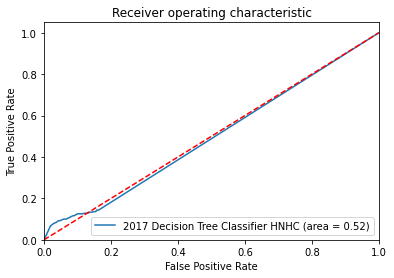

In [30]:
# Plotting the chart
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='2017 Decision Tree Classifier HNHC (area = %0.2f)' % rf_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('images\Decision_Tree_Classifier_HNHC_ROC_5_2017')
plt.show()

In [31]:
# K-Fold Validation using Decision Tree Classifier
clf_log_rf = DecisionTreeClassifier(splitter = "best", max_depth = 5)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores_log_rf = cross_validate(clf_log_rf, cleaned_data_wo_outcome_selected, target_selected, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores_log_rf)

{'fit_time': array([0.02402544, 0.02403069, 0.02399945, 0.01600766, 0.01599932,
       0.01603055, 0.01596951, 0.01596785, 0.01599884, 0.01602197]), 'score_time': array([0.00799513, 0.        , 0.        , 0.00799799, 0.00800014,
       0.        , 0.00803089, 0.008039  , 0.00796962, 0.00800085]), 'test_roc_auc': array([0.68587739, 0.69491195, 0.70498628, 0.69390537, 0.67815146,
       0.70899815, 0.68714434, 0.70273541, 0.73836471, 0.71511115]), 'train_roc_auc': array([0.71968606, 0.71941867, 0.71284387, 0.72061703, 0.72056098,
       0.71868156, 0.71896876, 0.71835415, 0.71235616, 0.71520668]), 'test_precision': array([0.        , 1.        , 0.        , 0.        , 0.5       ,
       0.        , 0.33333333, 1.        , 1.        , 0.        ]), 'train_precision': array([0.88888889, 1.        , 0.88888889, 0.75862069, 0.73076923,
       0.875     , 0.68292683, 0.71428571, 0.86666667, 1.        ]), 'test_recall': array([0.        , 0.01315789, 0.        , 0.        , 0.00657895,
     

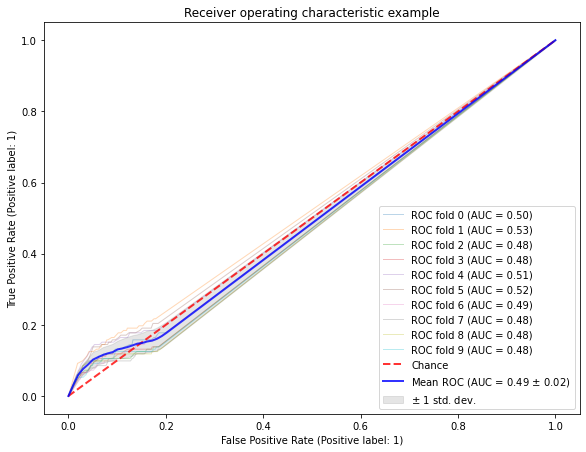

In [32]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = DecisionTreeClassifier(random_state=42)
    
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(9.6,7.2))
for i, (train, test) in enumerate(cv.split(cleaned_data_wo_outcome_selected, target_selected)):
    classifier.fit(cleaned_data_wo_outcome_selected.iloc[list(train)], target_selected.iloc[list(train)])
    viz = plot_roc_curve(classifier, cleaned_data_wo_outcome_selected.iloc[list(test)], target_selected.iloc[list(test)], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
    
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()